In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation

In [32]:
df = pd.read_csv('auto1_prep.csv', sep=',')
df

,brand,year,price,car_mileage,fuel,power,transmission
0,0,2006.0,8.584852,5.393628,0,2.0,2
1,1,2017.0,9.740969,5.351858,0,2.0,2
2,2,2015.0,9.629051,5.056246,0,2.0,2
3,0,2000.0,8.516993,5.703782,0,2.0,2
4,3,2010.0,9.937889,6.525030,0,3.0,1
...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2
213,4,2010.0,9.332558,5.509388,0,2.0,2
214,3,2000.0,8.517193,5.521461,0,3.0,2
215,3,2001.0,8.922658,5.913503,0,2.0,1


In [33]:
df['car age']=(2021-df['year'])

In [34]:
df

,brand,year,price,car_mileage,fuel,power,transmission,car age
0,0,2006.0,8.584852,5.393628,0,2.0,2,15.0
1,1,2017.0,9.740969,5.351858,0,2.0,2,4.0
2,2,2015.0,9.629051,5.056246,0,2.0,2,6.0
3,0,2000.0,8.516993,5.703782,0,2.0,2,21.0
4,3,2010.0,9.937889,6.525030,0,3.0,1,11.0
...,...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2,5.0
213,4,2010.0,9.332558,5.509388,0,2.0,2,11.0
214,3,2000.0,8.517193,5.521461,0,3.0,2,21.0
215,3,2001.0,8.922658,5.913503,0,2.0,1,20.0


In [35]:
df['cost level']=np.where (df['price']<=9.5,0,1)

In [36]:
df

,brand,year,price,car_mileage,fuel,power,transmission,car age,cost level
0,0,2006.0,8.584852,5.393628,0,2.0,2,15.0,0
1,1,2017.0,9.740969,5.351858,0,2.0,2,4.0,1
2,2,2015.0,9.629051,5.056246,0,2.0,2,6.0,1
3,0,2000.0,8.516993,5.703782,0,2.0,2,21.0,0
4,3,2010.0,9.937889,6.525030,0,3.0,1,11.0,1
...,...,...,...,...,...,...,...,...,...
212,0,2016.0,9.546741,5.135798,0,2.0,2,5.0,1
213,4,2010.0,9.332558,5.509388,0,2.0,2,11.0,0
214,3,2000.0,8.517193,5.521461,0,3.0,2,21.0,0
215,3,2001.0,8.922658,5.913503,0,2.0,1,20.0,0


In [37]:
p=['brand','car_mileage','fuel','power','transmission','car age']

In [38]:
X = df[p]
y = df['cost level']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [52]:
X_train

array([[-0.04185141, -0.02487134, -0.30468285, -0.23631928, -1.82432432,
        -1.4119282 ],
       [-0.74252493, -0.23428212, -0.30468285, -0.23631928,  0.51351351,
        -1.4119282 ],
       [-0.04185141,  0.54812041, -0.30468285, -0.23631928,  0.51351351,
        -0.02006116],
       ...,
       [-0.74252493,  0.26265619, -0.30468285, -0.23631928,  0.51351351,
        -0.36802792],
       [-0.74252493, -4.00157516, -0.30468285, -0.23631928,  0.51351351,
         0.67587236],
       [-0.27540925, -0.00568689, -0.30468285, -0.23631928,  0.51351351,
         0.3279056 ]])

# Feature Selection

In [40]:
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.509346
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.153     
Dependent Variable: cost level       AIC:              188.2338  
Date:               2021-12-06 20:35 BIC:              207.1536  
No. Observations:   173              Log-Likelihood:   -88.117   
Df Model:           5                LL-Null:          -104.02   
Df Residuals:       167              LLR p-value:      6.4924e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.1839      0.1950    -0.9430    0.3457    -0.5662     0.1983
x2    -0.0029      0.1958    -0.0146    0.9884    -0.3

Из множества переменных значимыми являются: power и car age.

In [41]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

1
[False False False False False  True]
[4 6 5 2 3 1]


# Fitting Logistic Regression

In [42]:
X_train_select=X_train[:,[False, False, False, True, False, True]]
X_test_select=X_test[:,[False, False, False, True, False, True]]

In [43]:
X_train_select

array([[-0.23631928, -1.4119282 ],
       [-0.23631928, -1.4119282 ],
       [-0.23631928, -0.02006116],
       [-0.23631928, -1.23794482],
       [-0.23631928, -0.36802792],
       [-0.23631928, -1.23794482],
       [-0.23631928, -1.06396144],
       [-0.23631928,  0.50188898],
       [ 2.88209997,  2.41570616],
       [-0.23631928,  1.02383912],
       [-0.23631928, -0.36802792],
       [-0.23631928, -1.4119282 ],
       [-0.23631928,  0.3279056 ],
       [-0.23631928,  1.37180588],
       [-0.23631928,  0.3279056 ],
       [-0.23631928,  0.3279056 ],
       [-0.23631928, -1.23794482],
       [-0.23631928,  0.50188898],
       [-0.23631928,  0.3279056 ],
       [ 2.88209997,  1.71977264],
       [ 2.88209997, -0.88997806],
       [ 2.88209997, -0.19404454],
       [-0.23631928, -1.23794482],
       [-0.23631928, -0.71599468],
       [-0.23631928, -1.23794482],
       [-0.23631928,  0.15392222],
       [ 2.88209997,  0.50188898],
       [-0.23631928, -0.71599468],
       [-0.23631928,

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

In [47]:
y_pred = lr.predict(X_test_select)
lr.score(X_test_select,y_test).round(3)

0.795

Мы видим,что модель в 79% совершает правильный пропуск и в 21% совершает ошибку.

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  5]
 [ 4  7]]


Видим, что 35 правильно распознанных примеров и 9 неправильно.

# Visualising

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


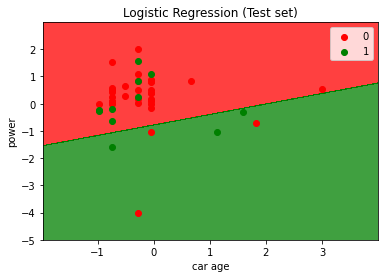

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('car age')
plt.ylabel('power')
plt.legend()
plt.show()

In [50]:
import pickle
obj = {'X_train': X_train_select, 'X_test': X_test_select,'y_train': y_train,'y_test': y_test}
output = open('data1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()